# <center>Project 1</center>

Authored by Joshua Burrows and Maksim Nikiforov.

## <center>1 Introduction</center>

To do (Maksim).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Read in the data
bike_data = pd.read_csv("bikeDetails.csv")

# Display a small snippet of it
bike_data.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [2]:
# Convert categorical variables to type "category"
bike_data.seller_type = bike_data.seller_type.astype("category")
bike_data.owner = bike_data.owner.astype("category")

## <center>2 Exploratory Data Analysis</center>
### <center>2.1 Numeric Summaries</center>

In [3]:
num_vars = bike_data[["selling_price", "km_driven", "ex_showroom_price"]]
num_vars.describe().round(1)

,selling_price,km_driven,ex_showroom_price
count,1061.0,1061.0,626.0
mean,59638.2,34359.8,87958.7
std,56304.3,51623.2,77496.6
min,5000.0,350.0,30490.0
25%,28000.0,13500.0,54852.0
50%,45000.0,25000.0,72752.5
75%,70000.0,43000.0,87031.5
max,760000.0,880000.0,1278000.0


In [27]:
# Create numeric summaries for selling_price and group by year
annual_num_summaries = bike_data \
.groupby("year") \
.agg(
    max_selling_price = ("selling_price", max), 
    min_selling_price = ("selling_price", min),
    standard_dev = ("selling_price", np.std)
)

# Identify number of motorcycles sold every year
num_sold = bike_data[["year", "name"]].groupby("year").count().sort_values(by="year", ascending=False)

# Merge number of motorcycles sold every year into our summaries data frame
annual_num_summaries["num_sold"] = num_sold["name"]

# Display numeric summaries for the last 10 years while rounding standard deviation
annual_num_summaries.sort_values(by="year", ascending=False).head(11).round(1)

,max_selling_price,min_selling_price,standard_dev,num_sold
year,,,,
2020,190000,175000,7637.6,3
2019,760000,40000,96703.4,86
2018,300000,30000,46394.5,131
2017,425000,18000,50627.9,133
2016,300000,23000,36006.2,107
2015,185000,20000,35627.3,100
2014,330000,15000,36973.1,91
2013,750000,15000,85138.2,73
2012,100000,12000,19431.2,70


In [4]:
# Create average price and km summaries for motorcycles
highest_lowest_selling = bike_data \
.groupby("name") \
.agg(
    mean_selling_price = ("selling_price", np.mean),
    mean_km_driven = ("km_driven", np.mean)
)

# Count number of sales for each make and model
names_sold = bike_data \
.groupby("name").count()

# Merge number of sales into price and km data frame
highest_lowest_selling["num_sold"] = names_sold["selling_price"]

# Show top 10 highest-priced motorcyles
highest_lowest_selling.sort_values(by="mean_selling_price", ascending=False).head(10).round(0)

,mean_selling_price,mean_km_driven,num_sold
name,,,
Suzuki GSX S750,760000.0,2800.0,1
Harley-Davidson Street Bob,750000.0,12000.0,1
Yamaha YZF R3,365000.0,1127.0,1
Kawasaki Ninja 650 [2018-2019],362500.0,12800.0,2
Harley-Davidson Street 750,330000.0,6500.0,1
Kawasaki Ninja 300,300000.0,9800.0,1
BMW G310GS,300000.0,2500.0,1
Royal Enfield Continental GT 650,299000.0,1500.0,1
Royal Enfield Interceptor 650,271667.0,5233.0,3


In [5]:
# Show top 10 lowest-priced motorcyles
highest_lowest_selling.sort_values(by="mean_selling_price", ascending=True).head(10).round(0)

,mean_selling_price,mean_km_driven,num_sold
name,,,
TVS Excel,5000.0,60000.0,1
Hero Honda Passion,9000.0,66191.0,1
Hero Honda CD100SS,10000.0,646000.0,1
Hero Honda CBZ,10000.0,48000.0,1
TVS Centra,10000.0,50000.0,1
Hero Honda Street Smart,10000.0,24000.0,1
Bajaj Boxer,12333.0,21833.0,3
Bajaj Super,13000.0,28000.0,2
TVS Scooty Pep DLX,14500.0,44000.0,1


### <center>2.2 Scatter Plots</center>

Scatter plots of *Selling Price* against the other numeric variables. 

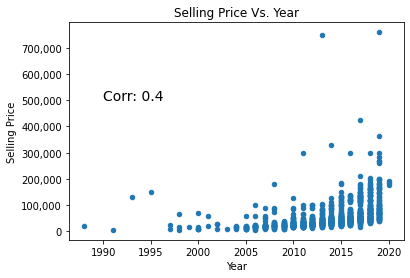

In [6]:
# What is the unit of selling_price? Is it in cents? 

# Create a scatter plot of Selling Price and Year
year_sp_corr, _ = stats.pearsonr(x = bike_data.year, y = bike_data.selling_price)

bike_data.plot.scatter(x = "year", y = "selling_price")
plt.title("Selling Price Vs. Year")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.yticks(ticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000],
           labels = ["0", "100,000", "200,000", "300,000", "400,000", "500,000", "600,000", "700,000"])
plt.text(1990, 500000, "Corr: " + str(round(year_sp_corr, 2)), fontsize = 14)
plt.show()

There is a mild correlation between *Selling Price* and *Year*. But the scatter plot suggests a quadratic relationship. Since, taking the log turns quadratic things into linear things, it's worth plotting the log of *Selling Price* against *Year* to see what we find. 

In [7]:
bike_data["log_selling_price"] = np.log(bike_data.selling_price)

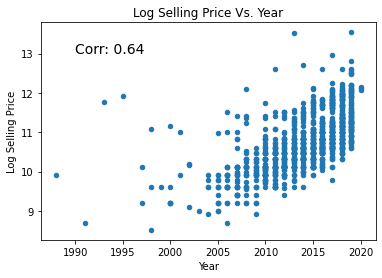

In [8]:
# Create a scatter plot of Log Selling Price and Year 
year_log_sp_corr, _ = stats.pearsonr(x = bike_data.year, y = bike_data.log_selling_price)

bike_data.plot.scatter(x = "year", y = "log_selling_price")
plt.title("Log Selling Price Vs. Year")
plt.xlabel("Year")
plt.ylabel("Log Selling Price")
plt.text(1990, 13, "Corr: " + str(round(year_log_sp_corr, 2)), fontsize = 14)
plt.show()

There is in fact a stronger linear relationship between the log of *Selling Price* and *Year*. 

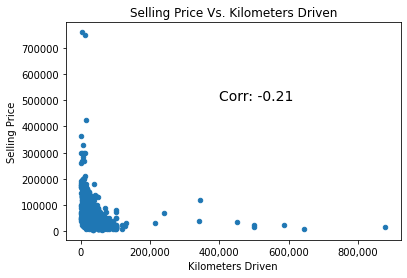

In [9]:
# Create a scatter plot of Selling Price and Km Driven
km_sp_corr, _ = stats.pearsonr(x = bike_data.km_driven, y = bike_data.selling_price)

bike_data.plot.scatter(x = "km_driven", y = "selling_price")
plt.title("Selling Price Vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.xticks(ticks = [0, 200000, 400000, 600000, 800000],
           labels = ["0", "200,000", "400,000", "600,000", "800,000"])
plt.text(400000, 500000, "Corr: " + str(round(km_sp_corr, 2)), fontsize = 14)
plt.show()

There is a weak linear relationship between *Selling Price* and *Kilometers Driven*. But it is clear that that relationship will get stronger if we remove the outliers. Let's see what happens when bikes with greater than 200,000 km are removed. 

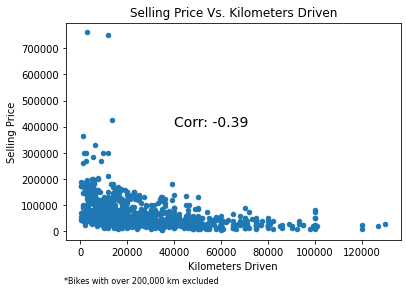

In [10]:
# Try without outlier kilometerage 
bike_data_low_km = bike_data[bike_data.km_driven <= 200000]

km_sp_corr_low_km, _ = stats.pearsonr(x = bike_data_low_km.km_driven, 
                                      y = bike_data_low_km.selling_price)

bike_data_low_km.plot.scatter(x = "km_driven", y = "selling_price")
plt.title("Selling Price Vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.text(40000, 400000, "Corr: " + str(round(km_sp_corr_low_km, 2)), fontsize = 14)
plt.text(-7000, -200000, "*Bikes with over 200,000 km excluded", fontsize = 8)
plt.show()

The linear relationship does in fact get stronger when the outliers are removed. Is removing the outliers justified? It is plausible that sales of high kilometerage bikes are rare, so we may not have enough data on those sales for a pattern to emerge. So it does not seem unreasonable to remove the outliers in this case.  
<br>
Again, the relationship appears quadratic, so let's take the log. 

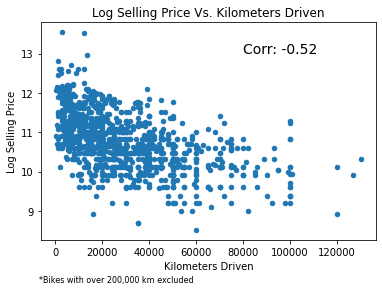

In [11]:
# Now there appears to be a quadratic relationship. Try log. 
km_log_sp_corr_low_km, _ = stats.pearsonr(x = bike_data_low_km.km_driven, 
                                          y = bike_data_low_km.log_selling_price)

bike_data_low_km.plot.scatter(x = "km_driven", y = "log_selling_price")
plt.title("Log Selling Price Vs. Kilometers Driven")
plt.xlabel("Kilometers Driven")
plt.ylabel("Log Selling Price")
plt.text(80000, 13, "Corr: " + str(round(km_log_sp_corr_low_km, 2)), fontsize = 14)
plt.text(-7000, 7.2, "*Bikes with over 200,000 km excluded", fontsize = 8)
plt.show()

After removing outliers and taking the log, a stronger linear relationship is uncovered. 

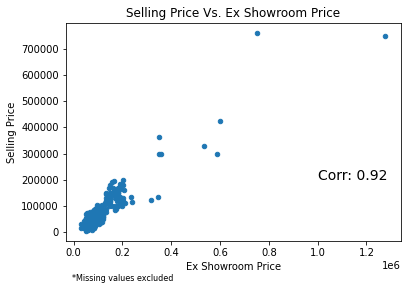

In [12]:
# Scatter plot of Selling Price and Ex Showroom Price 
bike_data_drop_na = bike_data.dropna()

show_sp_corr, _ = stats.pearsonr(x = bike_data_drop_na.ex_showroom_price, 
                                 y = bike_data_drop_na.selling_price)

bike_data_drop_na.plot.scatter(x = "ex_showroom_price", y = "selling_price")
plt.title("Selling Price Vs. Ex Showroom Price")
plt.xlabel("Ex Showroom Price")
plt.ylabel("Selling Price")
#plt.xticks(ticks = [0, 200000, 400000, 600000, 800000, 1000000, 1200000],
           #labels = ["0", "200,000", "400,000", "600,000", "800,000", "1,000,000", "1,200,000"])
plt.text(1000000, 200000, "Corr: " + str(round(show_sp_corr, 2)), fontsize = 14)
plt.text(-7000, -185000, "*Missing values excluded", fontsize = 8)
plt.show()

The linear relationship between *Selling Price* and *Ex Showroom Price* is extremely strong. 

### <center>2.3 Box Plots</center>

Box plots of *Selling Price* against the categorical variables *Seller Type* and *Owner*. 

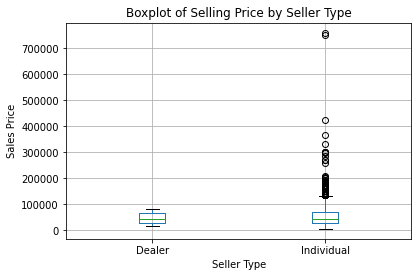

In [13]:
# Box plot of Selling Price by Seller Type 
bike_data.boxplot(column = ["selling_price"], 
                  by = "seller_type")
plt.suptitle("")
plt.title("Boxplot of Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()

There are so many outliers that it's difficult to see what's going on. Let's remove them from the plot. 

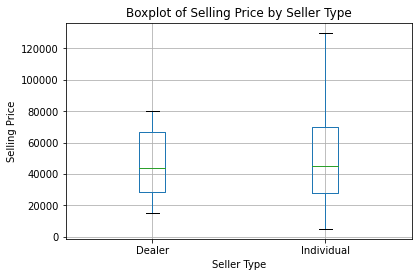

In [14]:
bike_data.boxplot(column = "selling_price", 
                  by = "seller_type",
                  showfliers = False)
plt.suptitle("")
plt.title("Boxplot of Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Selling Price")
plt.show()

It is difficult to draw conclusions because only six bikes in the data set were sold by dealers. 

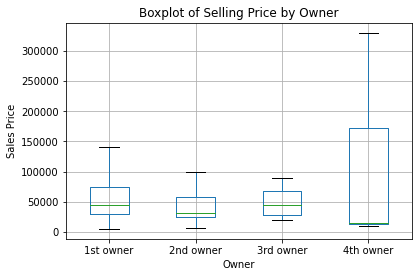

In [15]:
# Boxplot of Selling Price by Owner
bike_data.boxplot(column = "selling_price", 
                  by = "owner",
                  showfliers = False)
plt.suptitle("")
plt.title("Boxplot of Selling Price by Owner")
plt.xlabel("Owner")
plt.ylabel("Sales Price")
plt.show()

### <center>2.4 Contingency Table and Bar Plot</center>

Contingency table and bar plot of *Seller Type* by *Owner*. 

In [16]:
seller_owner_tab = pd.crosstab(bike_data.seller_type, bike_data.owner)
seller_owner_tab

owner,1st owner,2nd owner,3rd owner,4th owner
seller_type,,,,
Dealer,4,2,0,0
Individual,920,121,11,3


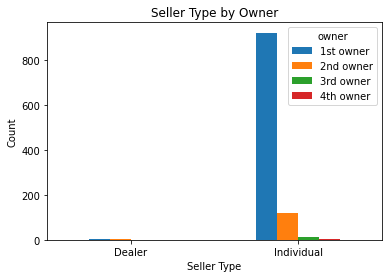

In [17]:
seller_owner_tab.plot.bar()
plt.title("Seller Type by Owner")
plt.xlabel("Seller Type")
plt.ylabel("Count")
plt.xticks(rotation = 0)
plt.show()

Individual sales by owner are by far the most common type of sale. 

## <center>Prediction of `selling_price`</center>

### Grid Search Algorithm

In [35]:
grid = [1000, 10000, 50000, 60000, 70000]

In [66]:
def calc_RMSE(y, c):
    diff = []
    rmse = {}
    for val in range(0, len(c)):
        diff = (y - c[val])**2
        rmse[c[val]] = np.sqrt(sum(diff)/len(y))
    return min(zip(rmse.values(), rmse.keys()))

In [67]:
calc_RMSE(bike_data.selling_price, grid)

(56278.9153947081, 60000)

In [51]:
def search_grid(y, c):
    rmse = []  
    diff = []
    for val in c:
        diff[val] = (y - c[val])**2
        rmse[val] = np.sqrt(sum(diff)/len(y))
    return rmse
    